In [38]:
#load the base functions
rm(list = ls())
setwd(rprojroot::find_rstudio_root_file())
source("base/Preprocess_data.R")
source("base/Regression_model.R")


In [214]:
#input data from preprocess
data_input <- preprocess_data(datetime_initialisation = '2020-10-01',
                              forecast_mode = "both",
                              catchment_code = "5410002",
                              predictor_list = c("pr_sum_-1months",'tem_mean_3months'))

data_input

,pr_sum_6months,tem_mean_3months
,<dbl>,<dbl>
1981,160.583,0.436333333
1982,960.180,2.424000000
1983,384.106,-1.633000000
1984,628.841,-0.800000000
1985,129.046,-0.626666667
1986,548.780,1.578000000
1987,763.566,-0.288333333
1988,137.727,-1.023666667
1989,381.328,-0.175666667


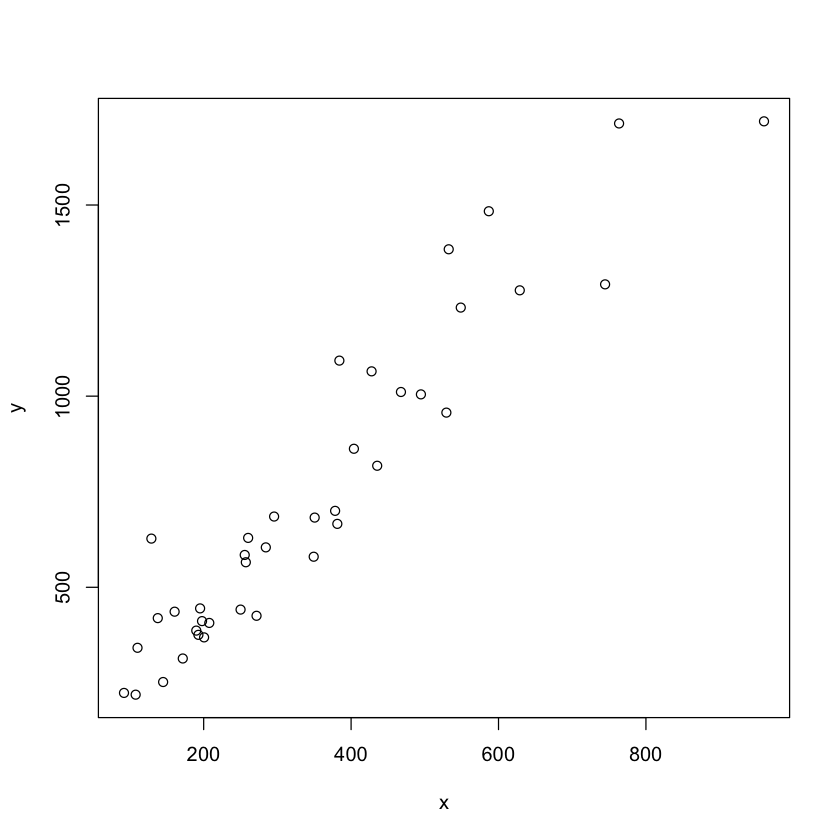

In [218]:
x = data_input$X_train[,1]
y = data_input$y_train$volume

plot(x,y)

In [228]:
library('boot')
library('elasticnet')
library('gam')

reg_method = "lm"

regression_model <- train_regression_model(data_input$X_train,
                                           data_input$y_train$volume,
                                           method = reg_method,
                                           preProcess = c("center", "scale"),
                                           resampling_method = "LOOCV",
                                           tuneLength = 10
                                           )
tune = regression_model$bestTune
tune

,intercept
,<lgl>
1,TRUE


In [229]:
y_best_model_pred = merge(
    regression_model$bestTune,
    regression_model$pred) %>%
    arrange(rowIndex)

head(y_best_model_pred)

    merge(regression_model$bestTune,regression_model$results)


,intercept,pred,obs,rowIndex
,<lgl>,<dbl>,<dbl>,<int>
1,TRUE,363.7465,436.1904,1
2,TRUE,1932.5251,1718.9014,2
3,TRUE,848.6717,1092.9773,3
4,TRUE,1339.6583,1276.8365,4
5,TRUE,324.2128,627.3763,5
6,TRUE,1070.4649,1231.7098,6


intercept,RMSE,Rsquared,MAE
<lgl>,<dbl>,<dbl>,<dbl>
TRUE,140.0435,0.8826388,114.4069


In [225]:
head(data_input$y_train)

,volume
,<dbl>
1981,436.1904
1982,1718.9014
1983,1092.9773
1984,1276.8365
1985,627.3763
1986,1231.7098


In [226]:

  bootstrapMod <- train(x = data_input$X_train,
                                         y = data_input$y_train$volume,
                                         method = reg_method,
                                         preProcess = c("center", "scale"),
                                         tuneGrid = tune,
                                         trControl = trainControl(method = "boot", savePredictions = "all",number = 2000)
  )
    
   
   




In [227]:
r=bootstrapMod$pred[c('obs','pred')]
see = sd(bootstrapMod$pred$obs-bootstrapMod$pred$pred)
see


[1] 146.0348

In [213]:
bootstrapMod$results

,intercept,RMSE,Rsquared,MAE,RMSESD,RsquaredSD,MAESD
,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,TRUE,475.134,0.05519016,401.1865,69.32802,0.08113611,57.60542


In [120]:
# Train and predict using regression model
library(boot)
f1 <- function(reg_method = "lm",boot_times = 500) {

regression_model <- train_regression_model(data_input$X_train,
                                           data_input$y_train$volume,
                                           method = reg_method,
                                           preProcess = c("center", "scale"),
                                           resampling_method = "LOOCV",
                                           tuneLength = 10
                                           )

bootSamples <- boot(data_input, function(data, idx) {
  tune = regression_model$bestTune
  bootstrapMod <- train_regression_model(select(mutate(data_input$X_train, id = row_number())[idx,],-'id'),
                                         data_input$y_train[idx, ],
                                         method = reg_method,
                                         preProcess = c("center", "scale"),
                                         tuneGrid = tune,
                                         resampling_method = "none"
  )
  
  #print(bootstrapMod$finalModel)
    #as.vector(coef(bootstrapMod$finalModel, tune[,ncol(tune)] ))
    as.vector(coef(bootstrapMod$finalModel ))

}, boot_times)

return(list(rm=regression_model,boot= bootSamples))
}

In [121]:
m1 = f1("lm")
m2 = f1("glm")
m3 = f1("gamLoess")
m4 = f1("knn")



Warning message in gam.lo(data[["lo(pr_sum_4months, span = 0.5, degree = 1)"]], :
“eval  3.4075”
Warning message in gam.lo(data[["lo(pr_sum_4months, span = 0.5, degree = 1)"]], :
“upperlimit  2.114”
Warning message in gam.lo(data[["lo(pr_sum_4months, span = 0.5, degree = 1)"]], :
“extrapolation not allowed with blending”
Warning message in gam.lo(data[["lo(tem_mean_3months, span = 0.5, degree = 1)"]], :
“eval  -2.9081”
Warning message in gam.lo(data[["lo(tem_mean_3months, span = 0.5, degree = 1)"]], :
“lowerlimit  -2.0558”
Warning message in gam.lo(data[["lo(tem_mean_3months, span = 0.5, degree = 1)"]], :
“extrapolation not allowed with blending”
Warning message in gam.lo(data[["lo(pr_sum_4months, span = 0.5, degree = 1)"]], :
“eval  -1.2666”
Warning message in gam.lo(data[["lo(pr_sum_4months, span = 0.5, degree = 1)"]], :
“lowerlimit  -1.1715”
Warning message in gam.lo(data[["lo(pr_sum_4months, span = 0.5, degree = 1)"]], :
“extrapolation not allowed with blending”


In [122]:
make_predictions(m1$rm,X_test = data_input$X_test)
make_predictions(m2$rm,X_test = data_input$X_test)
make_predictions(m3$rm,X_test = data_input$X_test)
make_predictions(m4$rm,X_test = data_input$X_test)

data_input$y_test



2020 
654.0421

2020 
654.0421

2020 
567.2667

[1] 533.7739

,volume
,<dbl>
2020,770.8871


In [123]:
m1$boot
m2$boot
m3$boot
m4$boot


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = data_input, statistic = function(data, idx) {
    tune = regression_model$bestTune
    bootstrapMod <- train_regression_model(select(mutate(data_input$X_train, 
        id = row_number())[idx, ], -"id"), data_input$y_train[idx, 
        ], method = reg_method, preProcess = c("center", "scale"), 
        tuneGrid = tune, resampling_method = "none")
    as.vector(coef(bootstrapMod$finalModel))
}, R = boot_times)


Bootstrap Statistics :
      original     bias    std. error
t1* 1013.69718   2.743533   162.94609
t2*  522.29824 -27.753094   114.99710
t3*  -48.71883  16.452129    91.37236


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = data_input, statistic = function(data, idx) {
    tune = regression_model$bestTune
    bootstrapMod <- train_regression_model(select(mutate(data_input$X_train, 
        id = row_number())[idx, ], -"id"), data_input$y_train[idx, 
        ], method = reg_method, preProcess = c("center", "scale"), 
        tuneGrid = tune, resampling_method = "none")
    as.vector(coef(bootstrapMod$finalModel))
}, R = boot_times)


Bootstrap Statistics :
      original     bias    std. error
t1* 1013.69718   3.148063    160.5340
t2*  522.29824 -18.531877    122.2276
t3*  -48.71883  17.728967    108.4549


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = data_input, statistic = function(data, idx) {
    tune = regression_model$bestTune
    bootstrapMod <- train_regression_model(select(mutate(data_input$X_train, 
        id = row_number())[idx, ], -"id"), data_input$y_train[idx, 
        ], method = reg_method, preProcess = c("center", "scale"), 
        tuneGrid = tune, resampling_method = "none")
    as.vector(coef(bootstrapMod$finalModel))
}, R = boot_times)


Bootstrap Statistics :
      original     bias    std. error
t1* 1013.69718   4.663917    162.0639
t2*  522.29824 -16.193181    133.9604
t3*  -48.71883  12.281917    117.9211

ERROR while rich displaying an object: Error in boot.out$t[, index]: subscript out of bounds

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_text.default(obj)
8. paste(capture.output(print